# Phase 3 Group Project:  Water Pumps in Tanzania

Presented by: Kelsey Lane, Andy Schmeck and Ted Brandon

Date:  10/29/2021

Instructor:  Angelica Spratley

github link:  https://github.com/andrewschmeck/Phase_3_Project-Kelsey-Ted-Andy

## Business Understanding

Andy will add this

##### Precision

Precision will be the metric used for this analysis.  This is due to the heavier weight of False Positives associated with this calculation.  Because some of these areas are quite remote, it is very important that we only send repair crews to the pumps/wells that are actually dysfunctional/malfunctioning.

## Data Understanding

Import the necessary modules and import the data:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from pandas.core.common import SettingWithCopyWarning

df_feat = pd.read_csv('../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')
df_targ = pd.read_csv('../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')
df = pd.concat([df_feat, df_targ], axis = 1)
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Column Investigation (work in progress still)

#### Typical exploration:  .info(), .head(), .describe(), .value_counts(), etc.,...

__59,400 rows x 42 columns in this initial data set__

Drop unnecessary or redundant columns:

 - id (unnecessary)
 - extraction_type, extraction_type_group, extraction_type_class (redundant, keeping class)
 - scheme_name (redundant, keeping scheme_management)
 - payment (redundant, keeping payment type)
 - quality_group (redundant, keeping water_quality)
 - quantity_group (redundant, keeping quantity)
 - source_type (redundant, keeping source/source_class)
 - water_type_group (redundant, keeping waterpoint_type)
 - region_code, district_code, ward, subvillage, and lga (redundant, keeping region, latitude & longitude)
 - num_private (unnecessary, no info)
 - recorded_by (unnecessary, all rows have the same value)

Confusing Columns: (****still undecided on these****)

 - Management/management group seem different
 - Turn amount_tsh into 0 and not 0
 - Construction year missing values
  - make new column based on this - date recorded?
  - group into decades & unknown?
 - Group some categoricals into Top 5 and Other?
  - funder
  - installer
  - scheme_management
  - wpt_name
 - Population
  - is "0" unknown or no nearby population?
  - maybe consider grouping into 100s or 1000s?
 - Missing (recorded) info from:
  - funder
  - installer
  - gps_height
  - population
  - construction_year

Feature Creation:

 - Use date_recorded to make a Month column, or a Season column?
 - Use lga to make rural/urban/unknown before dropping?
 

#### Visualization of well locations in Tanzania, using latitude/longitude and altitude:
 - Locations overlay well with map of Tanzania, with altitude of wells correlating with mountain ranges, and empty patches matching with either bodies of water, or uninhabitable areas.

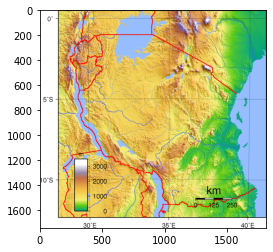

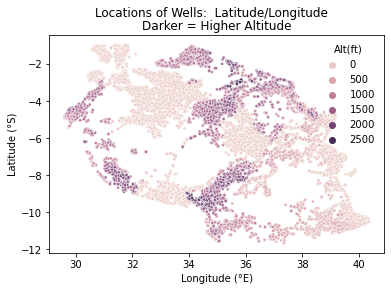

In [24]:
image = mpimg.imread("../Images/Tanzania_Topography.png")
plt.imshow(image)
plt.show()
df2 = df[df['latitude'] != 0]
df3 = df2[df2['longitude'] != 0]
sns.scatterplot(x = df3['longitude'], y = df3['latitude'], hue = df3['gps_height'],
                marker='.', alpha=0.75)
plt.suptitle('Locations of Wells:  Latitude/Longitude')
plt.title('Darker = Higher Altitude')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°S)')
plt.legend(fontsize=10, loc='upper right', frameon=False, title='Alt(ft)');
# plt.savefig('../Images/Tanzania_Wells_1.png', dpi=300);

### EDA & Cleaning

In [ ]:
# Trimming columns based on above information:

df_trim = df.drop(columns = ['id', 'extraction_type', 'extraction_type_group', 'scheme_name',
                            'payment', 'quality_group', 'quantity_group', 'source_type',
                            'waterpoint_type_group', 'region_code', 'district_code', 'ward',
                            'subvillage', 'lga', 'num_private', 'recorded_by', 'funder',
                            'public_meeting'], axis = 1)

In [3]:
# 1,812 0-values for latitude/longitude, corresponding to 3.1% of the data, are dropped:

df_trim = df_trim[df_trim['longitude'] != 0]

In [ ]:
# Missing values - Filling with "unknown" for categorical and median for boolean:



## Modeling

### Base Model:

### Model Iterations:

## Evaluation

## Interpretation

## Conclusions